# Build a model to predict the dogecoin price

# Objective: -

Dogecoin is a cryptocurrency, like Ethereum or Bitcoin — despite the fact that it’s totally different than both of these famous coins. Dogecoin was initially made to some extent as a joke for crypto devotees and took its name from a previously well-known meme. Dogecoin is the reason for the recent drop in bitcoin prices. The price of Dogecoin is currently very cheap compared to bitcoin, but some financial experts, including Tesla’s CEO Elon Musk, claiming that we will see a rise in the price of Dogecoin soon.

Predicting the price of a cryptocurrency is a regression problem in machine learning. Bitcoin is one of the most successful examples of cryptocurrency, but we recently saw a major drop in bitcoin prices due to dogecoin. Unlike bitcoin, dogecoin is very cheap right now, but financial experts are predicting that we may see a major increase in dogecoin prices.

Predicting the dogecoin is one of the most important applications of Machine Learning.

The ultimate goal is to predict dogecoin prices using Machine Learning and the python programming language.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [2]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

In this stage we are going to read our problem dataset and have a look on it.

In [3]:
#loading the dataset
try:
    df = pd.read_csv('F:\ML models\Dogecoin price prediction\Data\DOGE-USD.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [4]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-17,0.149050,0.149889,0.138071,0.138552,0.138552,721382126.0
1,2022-02-18,0.138594,0.142097,0.136960,0.138768,0.138768,563817289.0
2,2022-02-19,0.138764,0.145906,0.138751,0.141206,0.141206,655782652.0
3,2022-02-20,0.141197,0.141197,0.135852,0.136868,0.136868,490138547.0
4,2022-02-21,0.136838,0.141345,0.128246,0.128490,0.128490,913773124.0


# Dataset: -

The dataset used in this model is publicly available at kaggle.

**Attribute Information:**
1. Close (closeing price of stock)

**Five real-valued features are computed:**

1. Date
2. Open (openning price of stock)
3. High (highest price of stock)
4. Low (lowest price of stock)
5. Addj Close
6. Volume

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [5]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 366 rows and 7 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "close" column which says the value of dogecoins at the end of day.

In [6]:
df['Close'].value_counts()

0.084765    2
0.084581    2
0.058643    1
0.060347    1
0.059694    1
           ..
0.056995    1
0.055029    1
0.063000    1
0.055592    1
0.087420    1
Name: Close, Length: 363, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [7]:
df.shape

(366, 7)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 366 rows and 7 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

We can identify that the Close cloumn have continuous values. So, it is a regression problem.

In [9]:
df.iloc[1]

Date          2022-02-18
Open            0.138594
High            0.142097
Low              0.13696
Close           0.138768
Adj Close       0.138768
Volume       563817289.0
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [10]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [11]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['Date']


In [12]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [13]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  6
There name are as follow:  ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


## Step 2 Insights: -

1) We have total 7 features where 1 is object type while others are float type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.


# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.089074,0.092356,0.086153,0.088918,0.088918,8.184268e+08
std,0.027735,0.029310,0.026594,0.027561,0.027561,1.089771e+09
min,0.053007,0.057755,0.049720,0.053012,0.053012,1.582803e+08
25%,0.067174,0.069169,0.065516,0.067179,0.067179,3.690847e+08
50%,0.081698,0.084317,0.079727,0.081660,0.081660,5.185564e+08
75%,0.111278,0.116231,0.101071,0.108477,0.108477,8.380506e+08
max,0.172485,0.178045,0.147727,0.172907,0.172907,1.215764e+10


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical or float data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

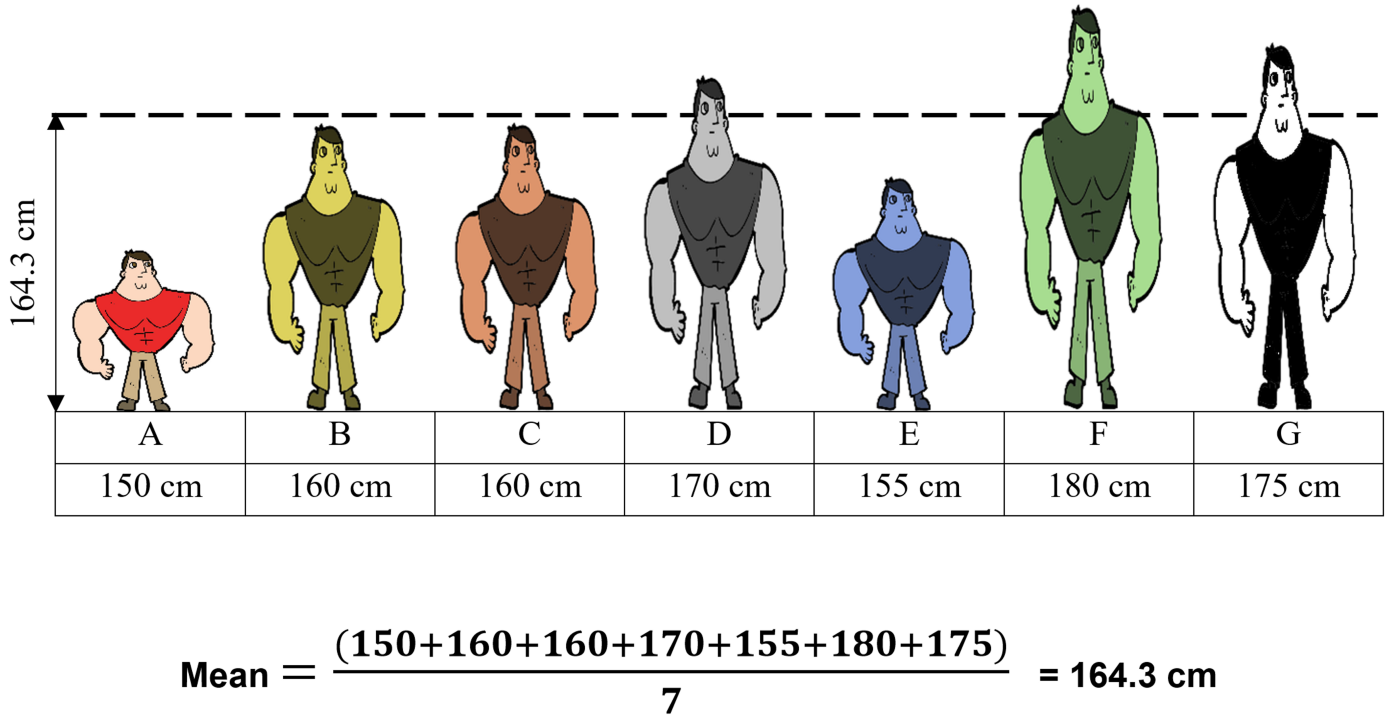

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [23]:
df.mean()

Open         8.907397e-02
High         9.235625e-02
Low          8.615270e-02
Close        8.891811e-02
Adj Close    8.891811e-02
Volume       8.184268e+08
dtype: float64

#### The average opening, high, low and closing of dogecoin is 8.907, 9.235, 8.615 and 8.891.

#### We can also understand the mean using the below function. 

In [24]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [25]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,0,0


In [26]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,6,0


zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


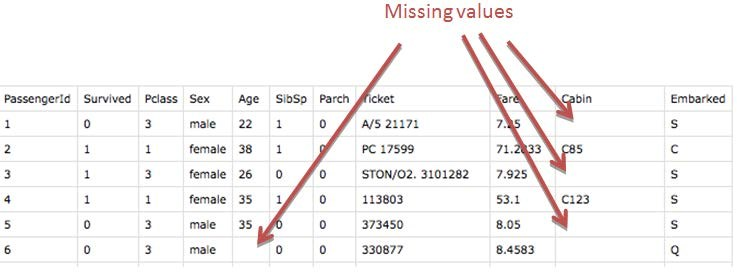

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [34]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

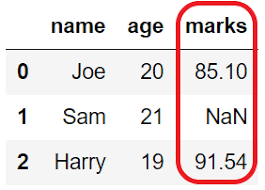

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [35]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

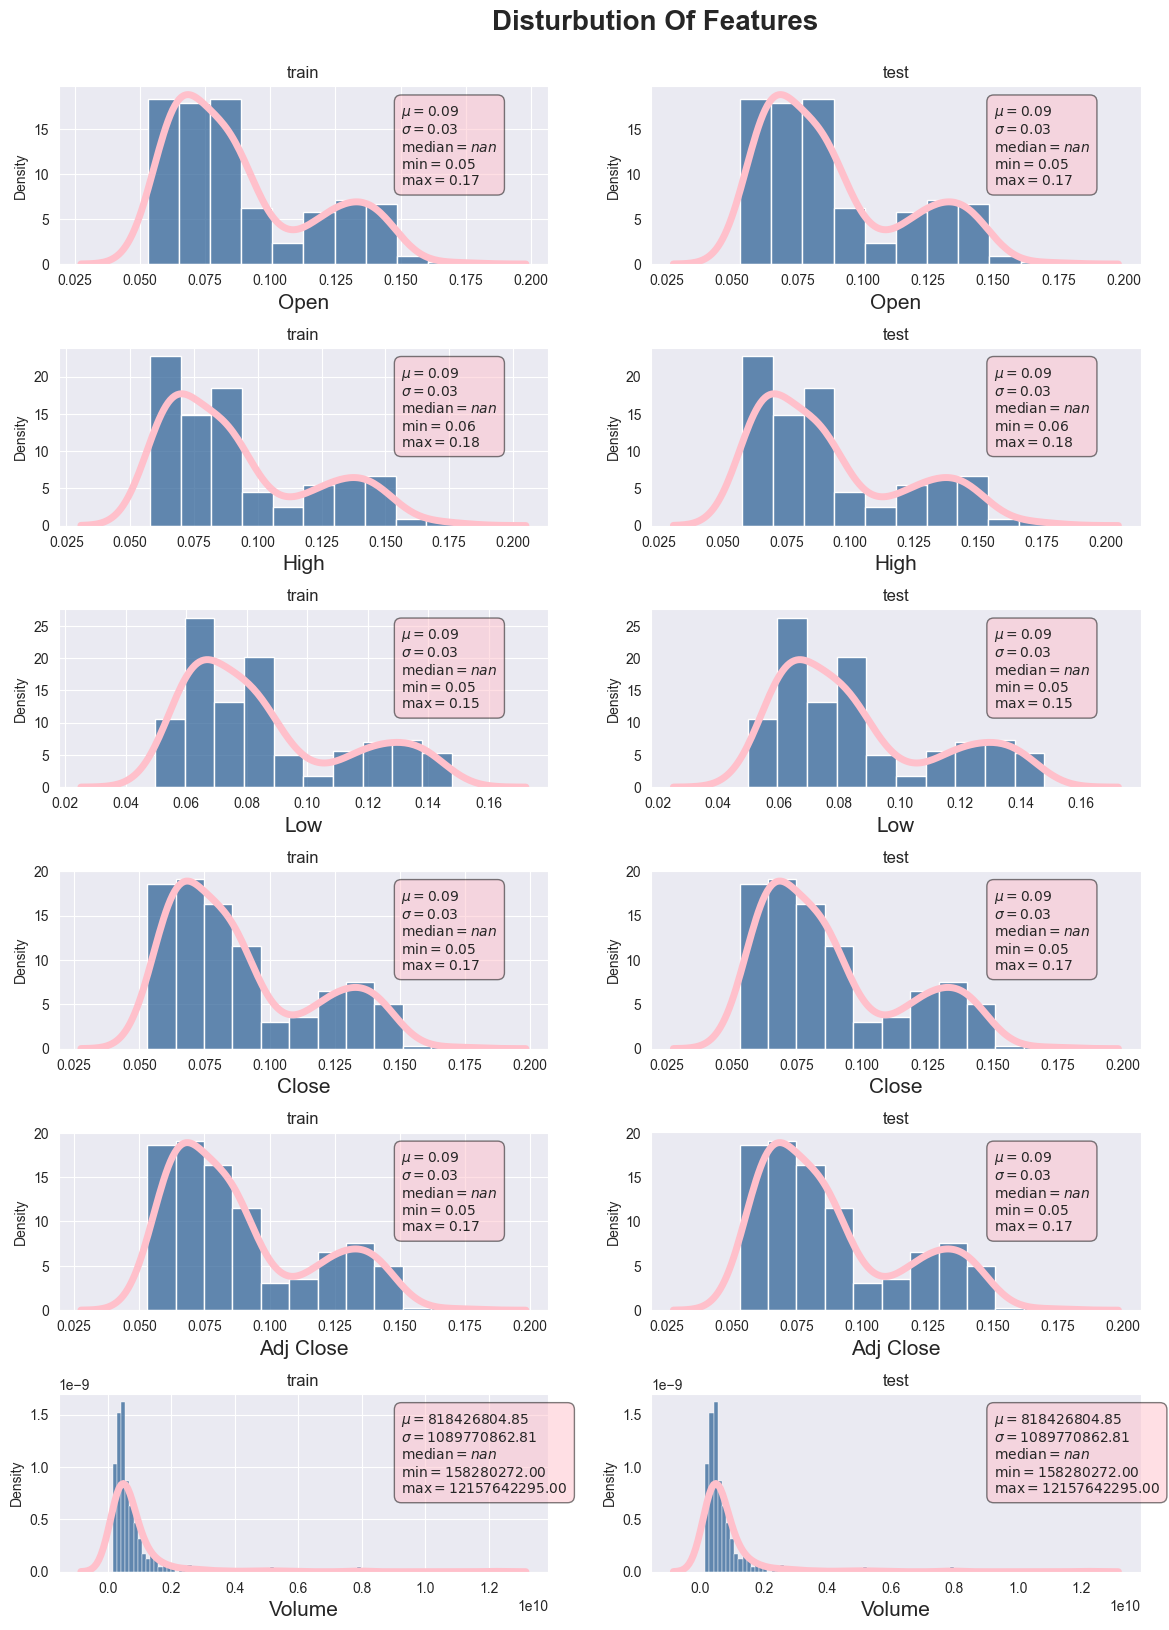

In [37]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df.select_dtypes(include=['float64','int64']).columns)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,fontweight = "bold")
plt.tight_layout()
plt.show()

# Count of unique occurences of every value in all categorical value



In [133]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

Date       2022-02-17    1
2022-10-26    1
2022-10-24    1
2022-10-23    1
2022-10-22    1
             ..
2022-06-17    1
2022-06-16    1
2022-06-15    1
2022-06-14    1
2023-02-17    1
Name: Date, Length: 365, dtype: int64


- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

# Skewness 

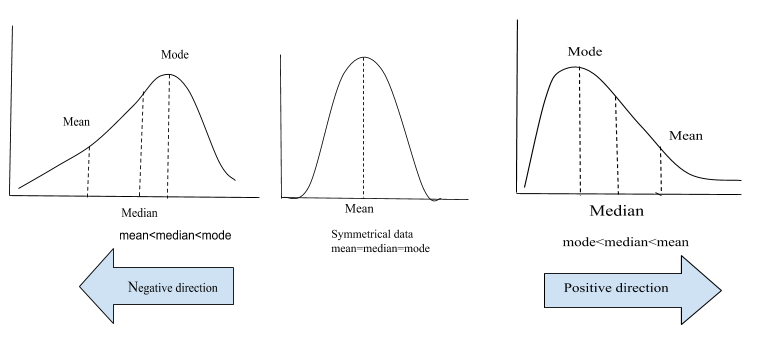

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [134]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [135]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [136]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Open,0.8358,positive (+ve) skewed
1,High,0.8534,positive (+ve) skewed
2,Low,0.8315,positive (+ve) skewed
3,Close,0.8424,positive (+ve) skewed
4,Adj Close,0.8424,positive (+ve) skewed
5,Volume,5.7003,positive (+ve) skewed


In [137]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,6,0,0


In [141]:
l=df

In [142]:
l['Volume']=np.sqrt(l['Volume'])

In [143]:
l.skew()

Open         0.835834
High         0.853442
Low          0.831543
Close        0.842368
Adj Close    0.842368
Volume       2.917808
dtype: float64

We notice with the above results that we have following details:
1. 6 columns are positive skewed



### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them, some of the columns are positively skewed while some are negative skewed. We have used cube root transformation to transform the skewness.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Dogecoin Historical Market Sentiments 2013 – 2021

- Dogecoin made its debut in December 2013 at dollar 0.0006 with a market capitalization of dollar 3.5 million. For a year, Dogecoin was on an upward trajectory and doubled exponentially.
- The year 2014 was not generous for Dogecoin, as new cryptocurrencies such as NEO, Stellar, and Monero emerged in the market.  As a result of which, DOGE’s price fell to dollar 0.0001.
- Co-founder Jackson Palmer quit the project unexpectedly in 2015. With the news, the world began to speak of DOGE’s impending death. DOGE managed to trade at dollar 0.00014 by the end of December 2015.
- Dogecoin did not cross the dollar0.0002-0.0003 price range until 2017, The value of the coin rose dramatically to dollar 0.003 in the     spring of 2017 and further continued to vary. Surprisingly, DOGE surged to dollar 0.007 by the end of 2017.
- Dogecoin price declined amidst tightening of cryptocurrencies across South East Asian countries, but it recovered quickly to hit dollar 0.017. The price concluded at dollar 0.002 to end the year 2018.
- The altcoin traded sideways in 2019 for much of the year. By the end of December 2019, Dogecoin was trading at dollar 0.0020.
- Dogecoin continued its trade at dollar 0.002 during the start of January. With a steady improvement, the price managed to reach dollar 0.003 by mid of February.
- DOGE started an upward trajectory amidst the expansion of Bitcoin’s price rally in and ended the year at dollar 0.004.
- The popular meme coin gained immense attention. When it surged over 800% and dumped nearly 300% in a single day. Later  following a series of events and support from Elon Musk, DOGE surged over 15,000%, to an all-time high of dollar 0.74 on 8th May! 
- The SNL event led to the meme coin’s plunge. Which was further aggravated by the market crash that left the price at dollar 0.22 on 19th May. Dogecoin had terminated the year with a price tag of dollar 0.168.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Scatter Plot to show the relation between variables

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

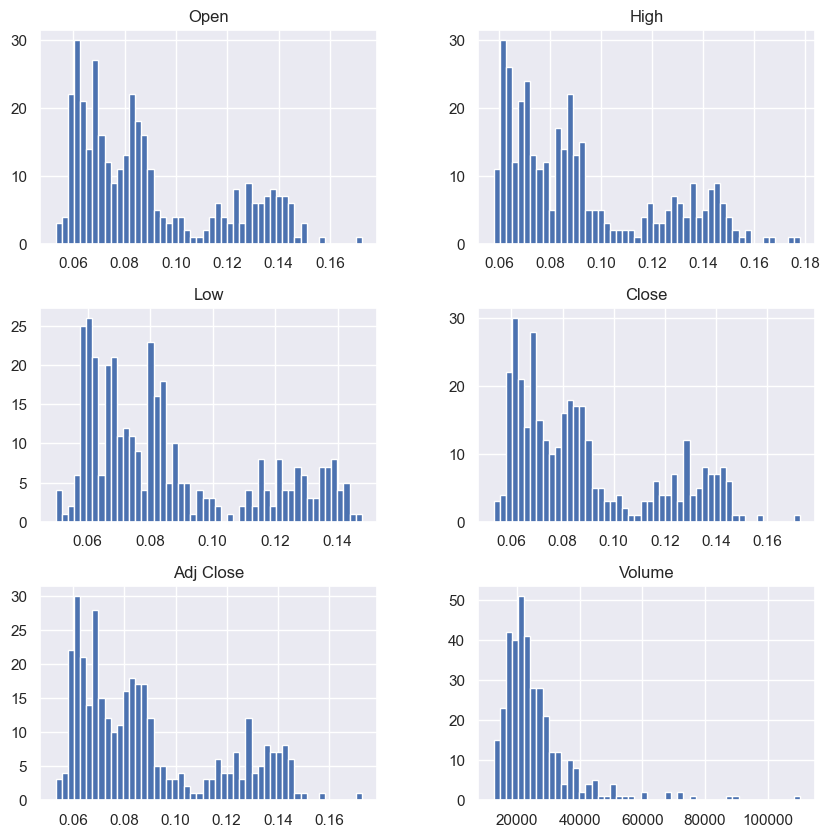

In [144]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,10))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### From the above histogram we observe that the dogecoin closing price is high as high the opening and adj closing.


### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

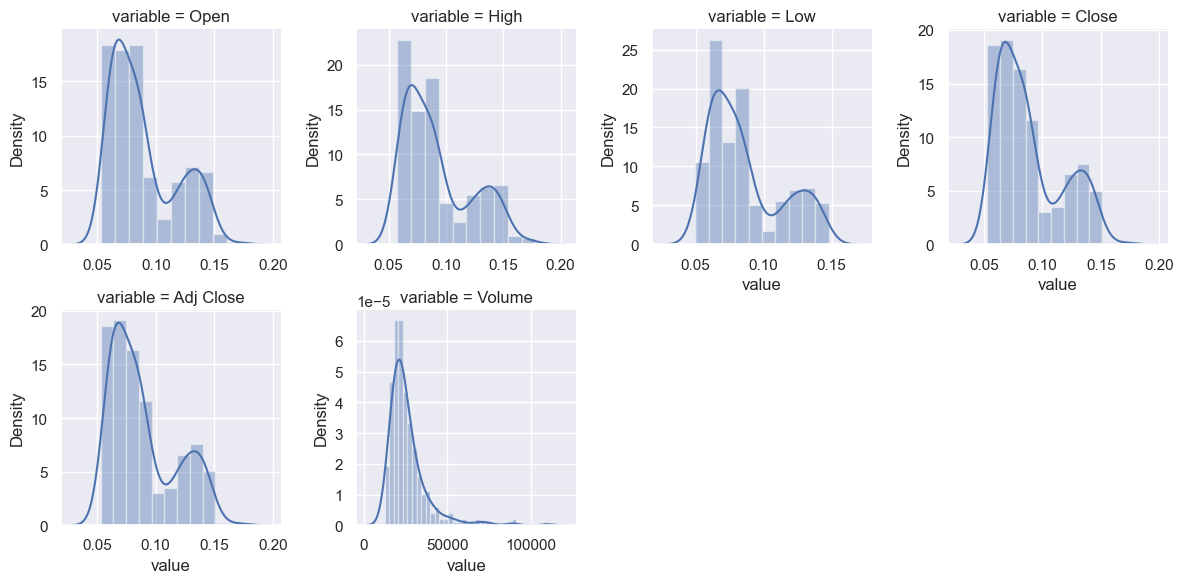

In [145]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [146]:
df.skew()

Open         0.835834
High         0.853442
Low          0.831543
Close        0.842368
Adj Close    0.842368
Volume       2.917808
dtype: float64

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 6 columns are positive skewed
2. 1 column is added here i.e Close which is our target variable which is also +ve skewed. In that case we'll need to square root transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [147]:
#+ve skewed 
df['Close'].skew()

0.8423683754608071

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



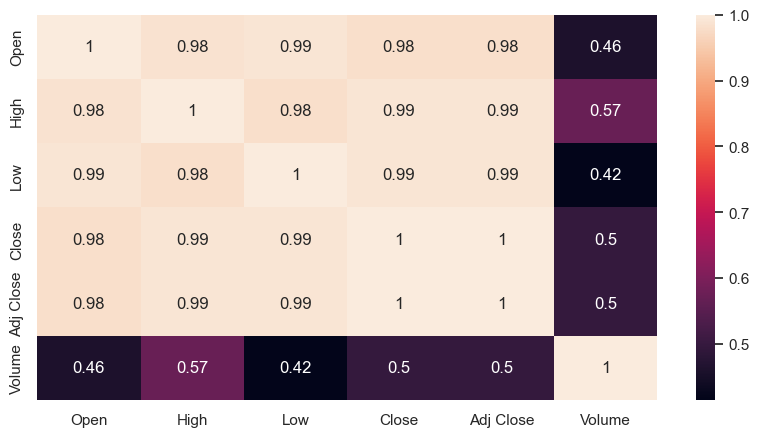

In [148]:
#correlation plot
sns.set(rc = {'figure.figsize':(10,5)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

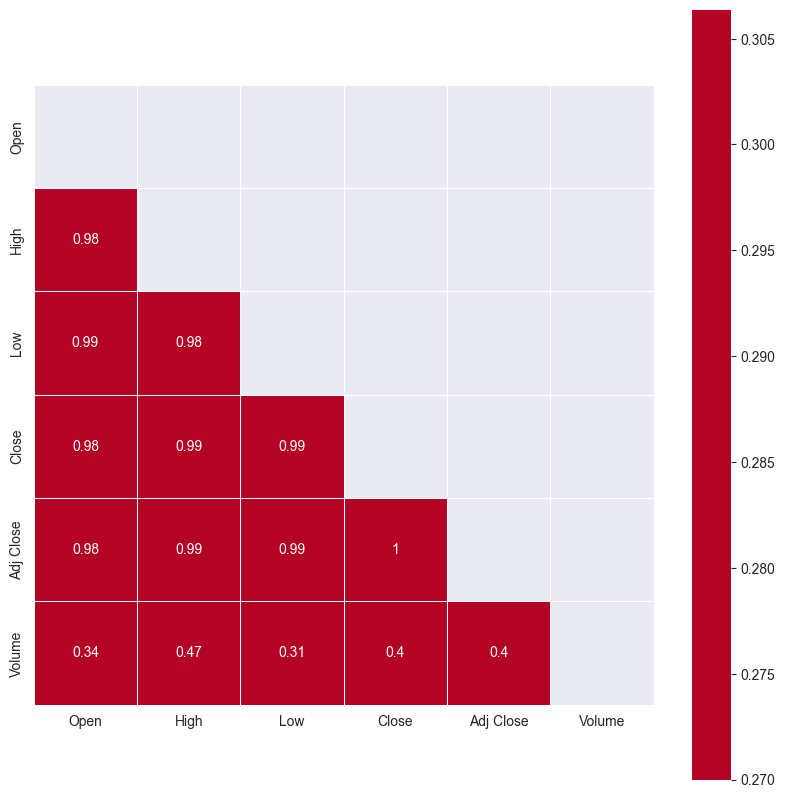

In [42]:
plt.figure(figsize=(10,10))
corr=df[df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df[df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against Close. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [149]:
print (corr['Close'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Close'].sort_values(ascending=False)[-5:]) #last 5 values`

Close        1.000000
Adj Close    1.000000
Low          0.990444
High         0.990028
Open         0.980506
Volume       0.497126
Name: Close, dtype: float64 

----------------------
Adj Close    1.000000
Low          0.990444
High         0.990028
Open         0.980506
Volume       0.497126
Name: Close, dtype: float64


Here we see that the Adj Close features are 100% correlated with the target variable.

In [150]:
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.984617,0.990328,0.980506,0.980506,0.460798
High,0.984617,1.000000,0.979452,0.990028,0.990028,0.572717
Low,0.990328,0.979452,1.000000,0.990444,0.990444,0.415227
Close,0.980506,0.990028,0.990444,1.000000,1.000000,0.497126
Adj Close,0.980506,0.990028,0.990444,1.000000,1.000000,0.497126
Volume,0.460798,0.572717,0.415227,0.497126,0.497126,1.000000


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

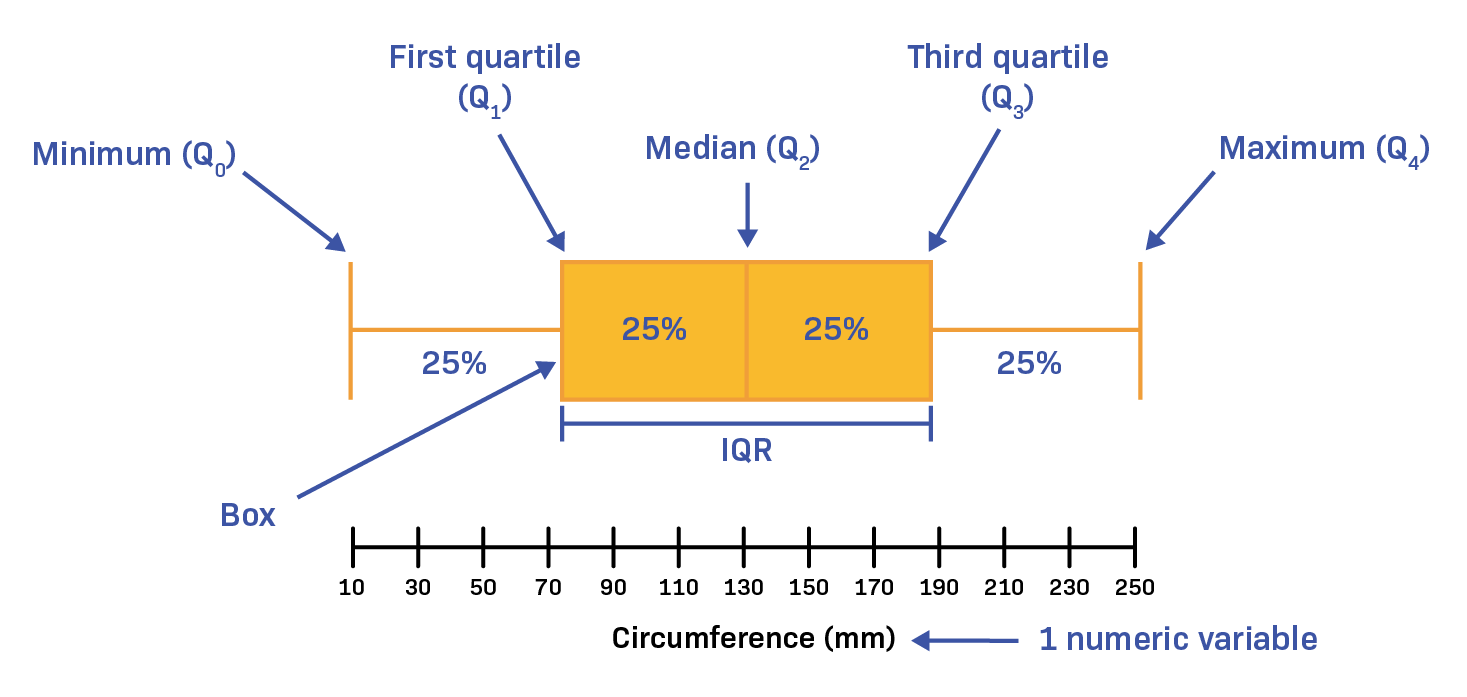

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [151]:
features = ['Open','High','Low','Adj Close','Volume']

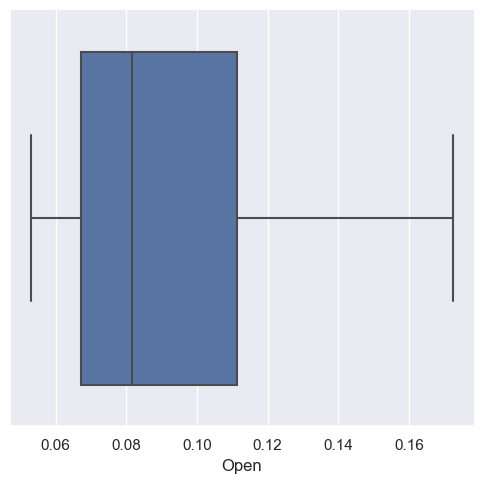

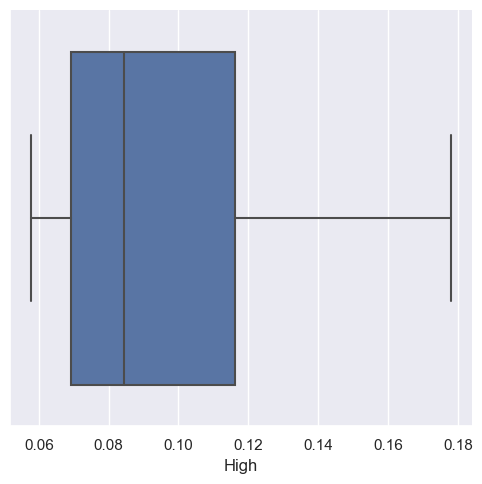

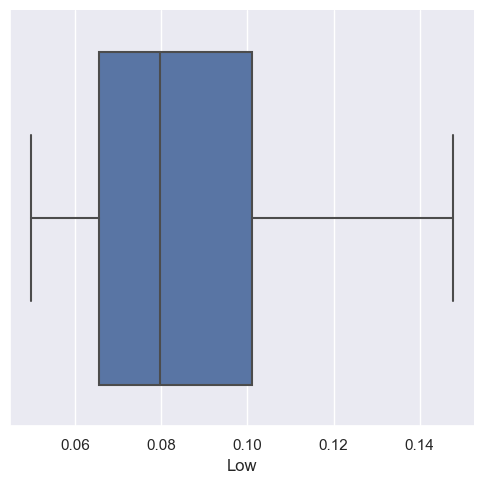

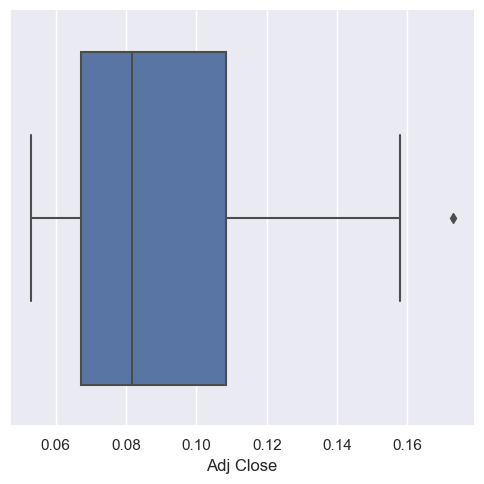

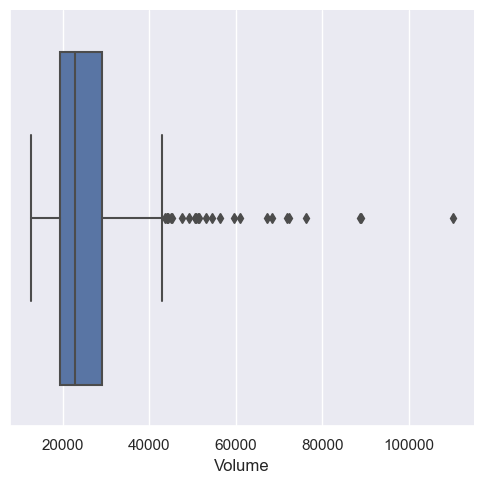

In [152]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

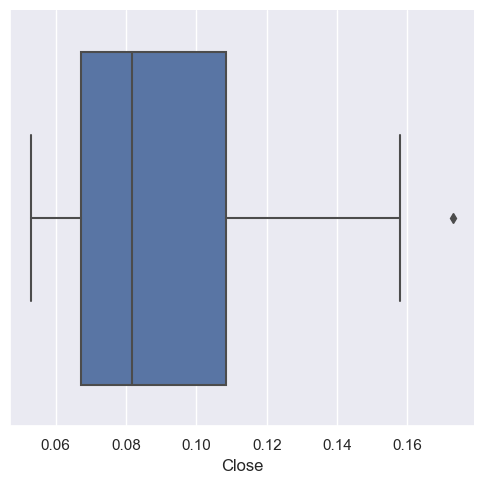

In [153]:
#for target variable
sns.catplot(data=df, x='Close', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



# 5. Scatter Plot

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.

In [154]:
import plotly.express as px
for value in features:
    figure = px.scatter(data_frame= df,x = value,y = 'Close',trendline = 'ols')
    
    figure.show()

The line between both th variables is called Best Fir Line.The least Sum of Squares of Errors is used as the cost function for Linear Regression. For all possible lines, calculate the sum of squares of errors. The line which has the least sum of squares of errors is the best fit line.The line drawn in a scatter plot, which is near to almost all the points in the plot is known as “line of best fit” or “trend line“.

### Scatter Plot insight:

We can observe that various variables like carwidth,curbweight,etc shows continous increase in price. Which relates that these variables are highly correlated with the target variables.

### Why use Scatter plot?

Scatter plots are used in either of the following situations.

When we have paired numerical data
When there are multiple values of the dependent variable for a unique value of an independent variable
In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on.

In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [155]:
# Separate target and feature column in X and y variable
target = 'Close'

# X will be the features
X = df.drop(['Close','Date'],axis=1) 
#y will be the target variable
y = df[target]

In [156]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       365 non-null    float64
 1   High       365 non-null    float64
 2   Low        365 non-null    float64
 3   Adj Close  365 non-null    float64
 4   Volume     365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [157]:
y

0      0.138552
1      0.138768
2      0.141206
3      0.136868
4      0.128490
         ...   
360    0.082144
361    0.082156
362    0.083534
363    0.089291
365    0.087420
Name: Close, Length: 365, dtype: float64

In [158]:
# Check the shape of X and y variable
X.shape, y.shape

((365, 5), (365,))

In [159]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [160]:
# Again check the shape of X and y variable
X.shape, y.shape

((365, 5), (365, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [161]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 5), (73, 5), (292, 1), (73, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is not discrete format so we have to apply regression algorithm. In our dataset we have the outcome variable or Dependent variable i.e Y having non discrete values. So we will use Regression algorithm.

__Algorithms we are going to use in this step__

1. Linear Regression
2. Lasso Regression
3. Ridge Regression

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [163]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables.

#### Train set cross-validation 

In [164]:
#Using Linear Regression Algorithm to the Training Set
from sklearn.linear_model import LinearRegression

log_R = LinearRegression() #Object Creation

log_R.fit(X_train, y_train)

LinearRegression()

In [165]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


1.0

In [166]:
#Accuracy of test data
log_R.score(X_test, y_test) 

1.0

In [167]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([8.67483759e-13, 8.22785492e-13, 5.06594287e-13, 3.54842145e-13,
       6.25190432e-13, 5.85502714e-13, 4.02307937e-13, 8.80716438e-13,
       7.77718796e-13, 4.13293857e-13])

In [168]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

6.23643585716549e-13

### Prediction 

Now we will perform prediction on the dataset using Linear Regression.

In [169]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

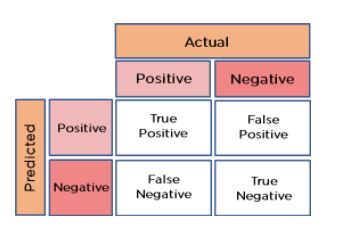

#### This diagram helps in understanding the concept of confusion matrix. 

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [170]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import r2_score  

li = r2_score(y_test, y_predicted)*100
print("The model used is Linear Regression")
print("R2 Score is: -")
print()
print(li)

The model used is Linear Regression
R2 Score is: -

100.0


# 2. Lasso Regression

Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

In [171]:
#Using Lasso Regression
from sklearn import linear_model
la = linear_model.Lasso(alpha=0.1)

In [172]:
#looking for training data
la.fit(X_train,y_train)

Lasso(alpha=0.1)

In [173]:
#Accuracy check of trainig data
la.score(X_train, y_train)

0.2563068705199294

### Prediction

In [174]:
# Predict the values on X_test_scaled dataset 
y_predicted=la.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [175]:
#Accuracy check of test data
lg = r2_score(y_test,y_predicted)*100
print("The model used is Lasso Regression")
print("R2 Score is: -")
print()
print(lg)

The model used is Lasso Regression
R2 Score is: -

16.311377518036053


# 3. Ridge Regression

Ridge regression is used when there are multiple variables that are highly correlated. It helps to prevent overfitting by penalizing the coefficients of the variables. Ridge regression reduces the overfitting by adding a penalty term to the error function that shrinks the size of the coefficients.

In [176]:
#Using Ridge Regression
from sklearn.linear_model import Ridge
ri = Ridge(alpha=1.0)

In [177]:
#looking for training data
ri.fit(X_train,y_train)

Ridge()

In [178]:
#Accuracy check of trainig data
ri.score(X_train, y_train)

0.7204563976975108

### Prediction

In [179]:
# Predict the values on X_test_scaled dataset 

y_predicted=ri.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [180]:
#Accuracy check of test data
rid = r2_score(y_test,y_predicted)*100
print("The model used is Ridge Regression")
print("R2 Score is: -")
print()
print(rid)

The model used is Ridge Regression
R2 Score is: -

68.65350452608082


# Insight: -

In [185]:
cal_metric=pd.DataFrame([li,lg,rid],columns=["Score in percentage"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression',
                  'Ridge Regression']
cal_metric

,Score in percentage
Linear Regression,100.000000
Lasso Regression,16.311378
Ridge Regression,68.653505



- As you can see with our Lasso Regression(0.9895 or 98.95%) we are getting a better result.
- So we gonna save our model with Lasso Regression Algorithm.

### To predict the stock price for the next few days we can use AutoTs Machine Learning Algorithm.

In [183]:
from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(df, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast
print("DogeCoin Price Prediction")
print(forecast)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 8: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model ETS in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLM in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 w

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents in generation 0 of 10
Model Number: 45 with model ETS in generation 0 of 10
Model Number: 46 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 46: VECM
Model Number: 47 with model ARDL in generation 0 of 10
Model Number: 48 with model MultivariateMotif in generation 0 of 10
Model Number: 49 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 58 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 60: UnivariateRegression
Model Number: 61 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 61: ARCH
Model Number: 62 with model ConstantNaive in generation 0 of 10
Model Number: 63 with model LastValueNaive in generation 0 of 10
Model Number: 64 with model AverageValueNaive in generation 0 of 10
Model Number: 65 with model GLS in generation 0 of 10
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 67: GLM
Model Number: 68 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 112 with model MetricMotif in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 113 with model AverageValueNaive in generation 0 of 10
Model Number: 114 with model ARDL in generation 0 of 10
Model Number: 115 with model ARDL in generation 0 of 10
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 117 with model SeasonalNaive in generation 0 of 10
Model Number: 118 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 118: ARDL
Model Number: 119 with model ConstantNaive in generation 0 of 10
Model Number: 120 with model ARIMA in generation 0 of 10
Model Number: 121 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 121: ARCH
Model Number: 122 with model Theta in generation 0 of 10
Model Number: 123 with model UnivariateMotif in generation 0 of 10
Model Number: 124 with model UnivariateMotif in generation 0 of 10
Model Number: 125 with model DatepartRegression in gener

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 126 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 126: GLM
Model Number: 127 with model LastValueNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 128 with model SectionalMotif in generation 0 of 10
Model Number: 129 with model ConstantNaive in generation 0 of 10
Model Number: 130 with model UnivariateMotif in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 132: VAR
Model Number: 133 with model UnivariateMotif in generation 0 of 10
Model Number: 134 with model SeasonalNaive in generation 0 of 10
Model Number: 135 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 135: ARCH
Model Number: 136 with model LastValueNaive in generation 0 of 10
Model Number: 137 with model WindowRegression in generation 0 of 10
Model Number: 138 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 138: GLM
Mo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 201 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 201: GLM
Model Number: 202 with model WindowRegression in generation 1 of 10
Model Number: 203 with model UnivariateMotif in generation 1 of 10
Model Number: 204 with model MetricMotif in generation 1 of 10
Model Number: 205 with model MultivariateMotif in generation 1 of 10
Model Number: 206 with model LastValueNaive in generation 1 of 10
Model Number: 207 with model MultivariateMotif in generation 1 of 10
Model Number: 208 with model Theta in generation 1 of 10
Model Number: 209 with model MultivariateMotif in generation 1 of 10
Model Number: 210 with model AverageValueNaive in generation 1 of 10
Model Number: 211 with model LastValueNaive in generation 1 of 10
Model Number: 212 with model GLS in generation 1 of 10
Model Number: 213 with model MetricMotif in generation 1 of 10
Model Number: 214 with model ETS in gener

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


Model Number: 252 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 252: ARDL
Model Number: 253 with model UnivariateMotif in generation 1 of 10


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 254 with model GLS in generation 1 of 10
Model Number: 255 with model LastValueNaive in generation 1 of 10
Model Number: 256 with model SectionalMotif in generation 1 of 10
Model Number: 257 with model ConstantNaive in generation 1 of 10
Model Number: 258 with model SectionalMotif in generation 1 of 10
Model Number: 259 with model ConstantNaive in generation 1 of 10
Model Number: 260 with model SeasonalNaive in generation 1 of 10
Model Number: 261 with model ARIMA in generation 1 of 10
Model Number: 262 with model NVAR in generation 1 of 10
Model Number: 263 with model LastValueNaive in generation 1 of 10
Model Number: 264 with model SectionalMotif in generation 1 of 10
Model Number: 265 with model DatepartRegression in generation 1 of 10
Model Number: 266 with model UnobservedComponents in generation 1 of 10
Model Number: 267 with model UnivariateMotif in generation 1 of 10
Model Number: 268 with model UnobservedComponents in generation 1 of 10
Model Number: 269 with mod

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 353 with model MultivariateRegression in generation 2 of 10
Model Number: 354 with model SectionalMotif in generation 2 of 10
Model Number: 355 with model Theta in generation 2 of 10
Model Number: 356 with model Theta in generation 2 of 10
Model Number: 357 with model UnobservedComponents in generation 2 of 10
Model Number: 358 with model SeasonalNaive in generation 2 of 10
Model Number: 359 with model SeasonalNaive in generation 2 of 10
Model Number: 360 with model SectionalMotif in generation 2 of 10
Model Number: 361 with model DatepartRegression in generation 2 of 10
Model Number: 362 with model AverageValueNaive in generation 2 of 10
Model Number: 363 with model SeasonalNaive in generation 2 of 10
Model Number: 364 with model SectionalMotif in generation 2 of 10
Model Number: 365 with model Theta in generation 2 of 10
Model Number: 366 with model GLM in generation 2 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 417 with model MultivariateMotif in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 418 with model DatepartRegression in generation 2 of 10
Model Number: 419 with model Theta in generation 2 of 10
Model Number: 420 with model AverageValueNaive in generation 2 of 10
Model Number: 421 with model ARIMA in generation 2 of 10
Model Number: 422 with model ETS in generation 2 of 10
Model Number: 423 with model UnivariateMotif in generation 2 of 10
Model Number: 424 with model NVAR in generation 2 of 10
Model Number: 425 with model MetricMotif in generation 2 of 10
Model Number: 426 with model Theta in generation 2 of 10
Model Number: 427 with model MetricMotif in generation 2 of 10
Model Number: 428 with model SectionalMotif in generation 2 of 10
Model Number: 429 with model NVAR in generation 2 of 10
Model Number: 430 with model UnivariateMotif in generation 2 of 10
Model Number: 431 with model AverageValueNaive in generation 2 of 10
Model Number: 432 with model WindowRegression in generation 2 of 10
Model Number: 433 with model UnobservedComponents in generat

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 520 with model MetricMotif in generation 3 of 10


[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 521 with model MultivariateMotif in generation 3 of 10
Model Number: 522 with model MultivariateMotif in generation 3 of 10
Model Number: 523 with model MultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 523: MultivariateMotif
Model Number: 524 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 524: SectionalMotif
Model Number: 525 with model UnobservedComponents in generation 3 of 10
Model Number: 526 with model AverageValueNaive in generation 3 of 10
Model Number: 527 with model MetricMotif in generation 3 of 10
Model Number: 528 with model NVAR in generation 3 of 10
Model Number: 529 with model DatepartRegression in generation 3 of 10
Model Number: 530 with model SectionalMotif in generation 3 of 10
Model Number: 531 with model LastValueNaive in generation 3 of 10
Model Number: 532 with model SeasonalNaive in generation 3 of 

Model Number: 619 with model MetricMotif in generation 4 of 10
Model Number: 620 with model ARIMA in generation 4 of 10
Model Number: 621 with model ConstantNaive in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'Discretize', '1': 'AlignLastValue', '2': 'Round'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'decimals': 1, 'on_transform': False, 'on_inverse': True}}}. fail_on_forecast_nan=True") in model 621: ConstantNaive
Model Number: 622 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 622: UnobservedComponents
Model Number: 623 with model UnivariateMotif in generation 4 of 10
HolidayTransformer: no anomalies detected.
Model Number: 624 with model NVAR in generation 4 o

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 717 with model UnivariateMotif in generation 5 of 10
HolidayTransformer: no anomalies detected.
Model Number: 718 with model MultivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 718: MultivariateRegression
Model Number: 719 with model DatepartRegression in generation 5 of 10
Model Number: 720 with model SectionalMotif in generation 5 of 10
Model Number: 721 with model WindowRegression in generation 5 of 10
Model Number: 722 with model LastValueNaive in generation 5 of 10
Model Number: 723 with model MetricMotif in generation 5 of 10
Model Number: 724 with model ARDL in generation 5 of 10
Model Number: 725 with model MetricMotif in generation 5 of 10
Model Number: 726 with model SectionalMotif in generation 5 of 10
Model Number: 727 with model UnivariateMotif in generation 5 of 10
Model Number: 728 with model MultivariateMotif in generation 5 of 10
Model Number: 729 with model LastValueNaive in generation

Model Number: 781 with model AverageValueNaive in generation 5 of 10
Model Number: 782 with model MultivariateMotif in generation 5 of 10
Model Number: 783 with model SectionalMotif in generation 5 of 10
Model Number: 784 with model SectionalMotif in generation 5 of 10
Model Number: 785 with model NVAR in generation 5 of 10
Model Number: 786 with model ARDL in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 787: DatepartRegression
Model Number: 788 with model ARDL in generation 6 of 10
Model Number: 789 with model GLS in generation 6 of 10
Model Number: 790 with model LastValueNaive in generation 6 of 10
Model Number: 791 with model MetricMotif in generation 6 of 10
Model Number: 792 with model MetricMotif in generation 6 of 10
Model Number: 793 with model ARIMA in generation 6 of 10
Model Number: 794 with model SeasonalNaive

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 796 with model SeasonalNaive in generation 6 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 797 with model UnivariateMotif in generation 6 of 10
Model Number: 798 with model MetricMotif in generation 6 of 10
Model Number: 799 with model DatepartRegression in generation 6 of 10
Model Number: 800 with model MultivariateMotif in generation 6 of 10
Model Number: 801 with model WindowRegression in generation 6 of 10
Model Number: 802 with model MultivariateMotif in generation 6 of 10
Model Number: 803 with model GLS in generation 6 of 10
Model Number: 804 with model ETS in generation 6 of 10
Model Number: 805 with model UnobservedComponents in generation 6 of 10
Model Number: 806 with model UnivariateMotif in generation 6 of 10
Model Number: 807 with model MultivariateRegression in generation 6 of 10
Model Number: 808 with model AverageValueNaive in generation 6 of 10
Model Number: 809 with model UnivariateMotif in generation 6 of 10
Model Number: 810 with model DatepartRegression in generation 6 of 10
Model Number: 811 with model LastValueNaive in generation 6 of 10

Model Number: 893 with model MetricMotif in generation 7 of 10
Model Number: 894 with model SectionalMotif in generation 7 of 10
Model Number: 895 with model MultivariateMotif in generation 7 of 10
Model Number: 896 with model UnivariateMotif in generation 7 of 10
Model Number: 897 with model MetricMotif in generation 7 of 10
Model Number: 898 with model AverageValueNaive in generation 7 of 10
Model Number: 899 with model LastValueNaive in generation 7 of 10
Model Number: 900 with model ETS in generation 7 of 10
Model Number: 901 with model UnivariateMotif in generation 7 of 10
Model Number: 902 with model WindowRegression in generation 7 of 10
Model Number: 903 with model GLS in generation 7 of 10
Model Number: 904 with model UnivariateMotif in generation 7 of 10
Model Number: 905 with model MultivariateRegression in generation 7 of 10
Model Number: 906 with model ARDL in generation 7 of 10
Model Number: 907 with model MetricMotif in generation 7 of 10
Model Number: 908 with model ARD

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


Model Number: 945 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 945: UnivariateMotif
Model Number: 946 with model NVAR in generation 7 of 10
Model Number: 947 with model ARDL in generation 7 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 948 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 949 with model ARIMA in generation 7 of 10
Model Number: 950 with model SeasonalNaive in generation 7 of 10
Model Number: 951 with model SectionalMotif in generation 7 of 10
Model Number: 952 with model LastValueNaive in generation 7 of 10
Model Number: 953 with model ARIMA in generation 7 of 10
Model Number: 954 with model SeasonalNaive in generation 7 of 10
Model Number: 955 with model WindowRegression in generation 7 of 10
Model Number: 956 with model AverageValueNaive in generation 7 of 10
Model Number: 957 with model SectionalMotif in generation 7 of 10
Model Number: 958 with model ARIMA in generation 7 of 10
Model Number: 959 with model ARDL in generation 7 of 10
Model Number: 960 with model MetricMotif in generation 7 of 10
Model Number: 961 with model MultivariateMotif in generation 7 of 10
Model Number: 962 with model WindowRegression in generation 7 of 10
Model Number: 963 with model MultivariateMotif in generation 7 of 10
Model Number: 964 with model ARDL in ge

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 992 with model MetricMotif in generation 8 of 10
Model Number: 993 with model Theta in generation 8 of 10
Model Number: 994 with model SectionalMotif in generation 8 of 10
Model Number: 995 with model NVAR in generation 8 of 10
Model Number: 996 with model ARIMA in generation 8 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 996: ARIMA
Model Number: 997 with model UnivariateMotif in generation 8 of 10
Model Number: 998 with model ARDL in generation 8 of 10
Model Number: 999 with model ARDL in generation 8 of 10
Model Number: 1000 with model UnivariateMotif in generation 8 of 10
Model Number: 1001 with model ETS in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1001: ETS
Model Number: 1002 with model MultivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1002: MultivariateMotif
Model Number: 1003 with model Unobser

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1059 with model LastValueNaive in generation 8 of 10
Model Number: 1060 with model ARDL in generation 8 of 10
Model Number: 1061 with model MetricMotif in generation 8 of 10
Model Number: 1062 with model ETS in generation 8 of 10
Model Number: 1063 with model LastValueNaive in generation 8 of 10
Model Number: 1064 with model SeasonalNaive in generation 8 of 10
Model Number: 1065 with model LastValueNaive in generation 8 of 10
Model Number: 1066 with model WindowRegression in generation 8 of 10
Model Number: 1067 with model UnivariateMotif in generation 8 of 10
Model Number: 1068 with model ConstantNaive in generation 8 of 10
Model Number: 1069 with model MultivariateMotif in generation 8 of 10
Model Number: 1070 with model SeasonalNaive in generation 8 of 10
Model Number: 1071 with model SectionalMotif in generation 8 of 10
Model Number: 1072 with model NVAR in generation 8 of 10
Model Number: 1073 with model MultivariateRegression in generation 8 of 10
Model Number: 1074

Model Number: 1162 with model SectionalMotif in generation 9 of 10
Model Number: 1163 with model SectionalMotif in generation 9 of 10
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 1163: SectionalMotif
Model Number: 1164 with model MultivariateMotif in generation 9 of 10
Model Number: 1165 with model LastValueNaive in generation 9 of 10
Model Number: 1166 with model DatepartRegression in generation 9 of 10
Model Number: 1167 with model MetricMotif in generation 9 of 10
Model Number: 1168 with model SeasonalNaive in generation 9 of 10
Model Number: 1169 with model DatepartRegression in generation 9 of 10
Model Number: 1170 with model Theta in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1170: Theta
Model Number: 1171 with model MultivariateMotif in generation 9 of 10
Model Number: 1172 with model MetricMotif in generation 9 of 10
Model Number: 1173 with model AverageValueNaive in generation 9 o

Model Number: 1268 with model Ensemble in generation 11 of Ensembles
Model Number: 1269 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 179 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 4.41: 
Model Number: 2 of 179 with model Ensemble for Validation 1
2 - Ensemble with avg smape 6.04: 
Model Number: 3 of 179 with model Ensemble for Validation 1
3 - Ensemble with avg smape 6.18: 
Model Number: 4 of 179 with model MultivariateMotif for Validation 1
4 - MultivariateMotif with avg smape 7.4: 
Model Number: 5 of 179 with model MultivariateMotif for Validation 1
5 - MultivariateMotif with avg smape 7.4: 
Model Number: 6 of 179 with model Ensemble for Validation 1
6 - Ensemble with avg smape 7.4: 
Model Number: 7 of 179 with model Ensemble for Validation 1
7 - Ensemble with avg smape 7.4: 
Model Number: 8 of 179 with model MultivariateMotif for Validation 1
8 - MultivariateMotif with avg smape 7.4: 
Model Number: 9 of 179 with mod

73 - ARIMA with avg smape 9.71: 
Model Number: 74 of 179 with model SeasonalNaive for Validation 1
74 - SeasonalNaive with avg smape 6.75: 
Model Number: 75 of 179 with model SeasonalNaive for Validation 1
75 - SeasonalNaive with avg smape 11.4: 
Model Number: 76 of 179 with model SeasonalNaive for Validation 1
76 - SeasonalNaive with avg smape 7.38: 
Model Number: 77 of 179 with model ARIMA for Validation 1
77 - ARIMA with avg smape 7.24: 
Model Number: 78 of 179 with model WindowRegression for Validation 1
78 - WindowRegression with avg smape 8.52: 
Model Number: 79 of 179 with model ARIMA for Validation 1
79 - ARIMA with avg smape 9.4: 
Model Number: 80 of 179 with model ARDL for Validation 1
80 - ARDL with avg smape 6.92: 
Model Number: 81 of 179 with model NVAR for Validation 1
81 - NVAR with avg smape 14.56: 
Model Number: 82 of 179 with model ARDL for Validation 1
82 - ARDL with avg smape 6.93: 
Model Number: 83 of 179 with model NVAR for Validation 1
83 - NVAR with avg smape 7.

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


112 - DatepartRegression with avg smape 16.69: 
Model Number: 113 of 179 with model SeasonalNaive for Validation 1
113 - SeasonalNaive with avg smape 9.73: 
Model Number: 114 of 179 with model GLS for Validation 1
114 - GLS with avg smape 15.21: 
Model Number: 115 of 179 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


115 - DatepartRegression with avg smape 16.74: 
Model Number: 116 of 179 with model WindowRegression for Validation 1
116 - WindowRegression with avg smape 7.65: 
Model Number: 117 of 179 with model WindowRegression for Validation 1
117 - WindowRegression with avg smape 7.65: 
Model Number: 118 of 179 with model SeasonalNaive for Validation 1
118 - SeasonalNaive with avg smape 4.27: 
Model Number: 119 of 179 with model DatepartRegression for Validation 1
119 - DatepartRegression with avg smape 19.04: 
Model Number: 120 of 179 with model DatepartRegression for Validation 1
120 - DatepartRegression with avg smape 19.04: 
Model Number: 121 of 179 with model SeasonalNaive for Validation 1
121 - SeasonalNaive with avg smape 4.55: 
Model Number: 122 of 179 with model ETS for Validation 1
122 - ETS with avg smape 13.65: 
Model Number: 123 of 179 with model ETS for Validation 1
123 - ETS with avg smape 13.65: 
Model Number: 124 of 179 with model ETS for Validation 1
124 - ETS with avg smape 13

13 - MetricMotif with avg smape 3.13: 
Model Number: 14 of 179 with model MetricMotif for Validation 2
📈 14 - MetricMotif with avg smape 2.6: 
Model Number: 15 of 179 with model Ensemble for Validation 2
15 - Ensemble with avg smape 2.65: 
Model Number: 16 of 179 with model UnivariateMotif for Validation 2
16 - UnivariateMotif with avg smape 3.09: 
Model Number: 17 of 179 with model MetricMotif for Validation 2
17 - MetricMotif with avg smape 3.09: 
Model Number: 18 of 179 with model MetricMotif for Validation 2
📈 18 - MetricMotif with avg smape 2.37: 
Model Number: 19 of 179 with model MetricMotif for Validation 2
19 - MetricMotif with avg smape 3.98: 
Model Number: 20 of 179 with model MetricMotif for Validation 2
20 - MetricMotif with avg smape 3.98: 
Model Number: 21 of 179 with model MultivariateMotif for Validation 2
21 - MultivariateMotif with avg smape 4.87: 
Model Number: 22 of 179 with model MultivariateMotif for Validation 2
22 - MultivariateMotif with avg smape 3.63: 
Model

88 - ARIMA with avg smape 6.88: 
Model Number: 89 of 179 with model GLS for Validation 2
89 - GLS with avg smape 9.47: 
Model Number: 90 of 179 with model DatepartRegression for Validation 2
90 - DatepartRegression with avg smape 8.4: 
Model Number: 91 of 179 with model DatepartRegression for Validation 2
91 - DatepartRegression with avg smape 2.04: 
Model Number: 92 of 179 with model UnobservedComponents for Validation 2
92 - UnobservedComponents with avg smape 1.93: 
Model Number: 93 of 179 with model MultivariateRegression for Validation 2
93 - MultivariateRegression with avg smape 8.97: 
Model Number: 94 of 179 with model ARDL for Validation 2
94 - ARDL with avg smape 6.02: 
Model Number: 95 of 179 with model ARDL for Validation 2
95 - ARDL with avg smape 6.02: 
Model Number: 96 of 179 with model NVAR for Validation 2
96 - NVAR with avg smape 5.06: 
Model Number: 97 of 179 with model ETS for Validation 2
97 - ETS with avg smape 2.21: 
Model Number: 98 of 179 with model ARIMA for Va

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


112 - DatepartRegression with avg smape 10.13: 
Model Number: 113 of 179 with model SeasonalNaive for Validation 2
113 - SeasonalNaive with avg smape 9.88: 
Model Number: 114 of 179 with model GLS for Validation 2
114 - GLS with avg smape 10.9: 
Model Number: 115 of 179 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


115 - DatepartRegression with avg smape 10.2: 
Model Number: 116 of 179 with model WindowRegression for Validation 2
116 - WindowRegression with avg smape 13.64: 
Model Number: 117 of 179 with model WindowRegression for Validation 2
117 - WindowRegression with avg smape 13.64: 
Model Number: 118 of 179 with model SeasonalNaive for Validation 2
118 - SeasonalNaive with avg smape 2.19: 
Model Number: 119 of 179 with model DatepartRegression for Validation 2
119 - DatepartRegression with avg smape 6.92: 
Model Number: 120 of 179 with model DatepartRegression for Validation 2
120 - DatepartRegression with avg smape 6.92: 
Model Number: 121 of 179 with model SeasonalNaive for Validation 2
121 - SeasonalNaive with avg smape 2.12: 
Model Number: 122 of 179 with model ETS for Validation 2
122 - ETS with avg smape 8.08: 
Model Number: 123 of 179 with model ETS for Validation 2
123 - ETS with avg smape 8.08: 
Model Number: 124 of 179 with model ETS for Validation 2
124 - ETS with avg smape 8.08:

12 - MetricMotif with avg smape 14.98: 
Model Number: 13 of 179 with model MetricMotif for Validation 3
13 - MetricMotif with avg smape 16.69: 
Model Number: 14 of 179 with model MetricMotif for Validation 3
14 - MetricMotif with avg smape 19.01: 
Model Number: 15 of 179 with model Ensemble for Validation 3
15 - Ensemble with avg smape 14.23: 
Model Number: 16 of 179 with model UnivariateMotif for Validation 3
16 - UnivariateMotif with avg smape 18.57: 
Model Number: 17 of 179 with model MetricMotif for Validation 3
17 - MetricMotif with avg smape 18.57: 
Model Number: 18 of 179 with model MetricMotif for Validation 3
18 - MetricMotif with avg smape 18.7: 
Model Number: 19 of 179 with model MetricMotif for Validation 3
19 - MetricMotif with avg smape 16.08: 
Model Number: 20 of 179 with model MetricMotif for Validation 3
20 - MetricMotif with avg smape 16.08: 
Model Number: 21 of 179 with model MultivariateMotif for Validation 3
21 - MultivariateMotif with avg smape 12.82: 
Model Numbe

87 - ARIMA with avg smape 9.25: 
Model Number: 88 of 179 with model ARIMA for Validation 3
88 - ARIMA with avg smape 7.29: 
Model Number: 89 of 179 with model GLS for Validation 3
89 - GLS with avg smape 9.34: 
Model Number: 90 of 179 with model DatepartRegression for Validation 3
90 - DatepartRegression with avg smape 5.78: 
Model Number: 91 of 179 with model DatepartRegression for Validation 3
91 - DatepartRegression with avg smape 21.04: 
Model Number: 92 of 179 with model UnobservedComponents for Validation 3
92 - UnobservedComponents with avg smape 12.66: 
Model Number: 93 of 179 with model MultivariateRegression for Validation 3
93 - MultivariateRegression with avg smape 3.98: 
Model Number: 94 of 179 with model ARDL for Validation 3
94 - ARDL with avg smape 11.33: 
Model Number: 95 of 179 with model ARDL for Validation 3
95 - ARDL with avg smape 7.78: 
Model Number: 96 of 179 with model NVAR for Validation 3
96 - NVAR with avg smape 7.01: 
Model Number: 97 of 179 with model ETS 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


112 - DatepartRegression with avg smape 5.22: 
Model Number: 113 of 179 with model SeasonalNaive for Validation 3
113 - SeasonalNaive with avg smape 8.69: 
Model Number: 114 of 179 with model GLS for Validation 3
114 - GLS with avg smape 7.05: 
Model Number: 115 of 179 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


115 - DatepartRegression with avg smape 5.27: 
Model Number: 116 of 179 with model WindowRegression for Validation 3
116 - WindowRegression with avg smape 8.92: 
Model Number: 117 of 179 with model WindowRegression for Validation 3
117 - WindowRegression with avg smape 4.52: 
Model Number: 118 of 179 with model SeasonalNaive for Validation 3
118 - SeasonalNaive with avg smape 11.36: 
Model Number: 119 of 179 with model DatepartRegression for Validation 3
119 - DatepartRegression with avg smape 56.13: 
Model Number: 120 of 179 with model DatepartRegression for Validation 3
120 - DatepartRegression with avg smape 12.92: 
Model Number: 121 of 179 with model SeasonalNaive for Validation 3
121 - SeasonalNaive with avg smape 10.16: 
Model Number: 122 of 179 with model ETS for Validation 3
122 - ETS with avg smape 11.71: 
Model Number: 123 of 179 with model ETS for Validation 3
123 - ETS with avg smape 16.1: 
Model Number: 124 of 179 with model ETS for Validation 3
124 - ETS with avg smape 18

4 - Ensemble with avg smape 9.45: 
Model Number: 5 of 8 with model Ensemble for Validation 1
5 - Ensemble with avg smape 7.26: 
Model Number: 6 of 8 with model Ensemble for Validation 1
6 - Ensemble with avg smape 6.27: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble with avg smape 9.19: 
Model Number: 8 of 8 with model Ensemble for Validation 1
8 - Ensemble with avg smape 9.04: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 1.87: 
Model Number: 2 of 8 with model Ensemble for Validation 2
2 - Ensemble with avg smape 1.89: 
Model Number: 3 of 8 with model Ensemble for Validation 2
3 - Ensemble with avg smape 2.51: 
Model Number: 4 of 8 with model Ensemble for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.

In [184]:
forecast

,Close
2023-02-18,0.086866
2023-02-19,0.086894
2023-02-20,0.086909
2023-02-21,0.087254
2023-02-22,0.087626
2023-02-23,0.087980
2023-02-24,0.088003
2023-02-25,0.088454
2023-02-26,0.088451
2023-02-27,0.088559


### If you want to predict the stock price for the next 5 or 10 days you can use AutoTs Machine Learning Algorithm as shown above.

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [186]:
import pickle
pickle.dump(log_R , open('Dogecoin_price_Prediction_li.pkl', 'wb'))
pickle.dump(la , open('Dogecoin_price_Prediction_la.pkl', 'wb'))
pickle.dump(ri , open('Dogecoin_price_Prediction_ri.pkl', 'wb'))

In [187]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Dogecoin_price_Prediction_li.pkl', 'rb'))
    Close = str(pickled_model.predict(features)[0][0])
    
    return str(f'The dogecoin price is {Close}')

#### We can test our model by giving our own parameters or features to predict. 

In [191]:
Open=0.138594
High=0.142097
Low=0.136960
AdjClose=0.138768
Volume=25608.253591

In [192]:
model_prediction([[Open,High,Low,AdjClose,Volume]])

'The close is 0.13876800000002612'

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps predicting the dogecoin price. The accuracy for the prediction is 100%.  